Import necessary packages to the code for data analysis

Pandas - Package for reading csv file and putting the data into a table format for easy retrieving

Read Gold's (XAUUSD) historical data saved as csv in one minute intervals

In [6]:
import pandas as pd

files = [
        "DAT_NT_XAUUSD_M1_202501.csv",
        "DAT_NT_XAUUSD_M1_202502.csv",
        "DAT_NT_XAUUSD_M1_202503.csv",
        "DAT_NT_XAUUSD_M1_202504.csv",
        "DAT_NT_XAUUSD_M1_202505.csv",
        "DAT_NT_XAUUSD_M1_202506.csv",
    ]

# Read the CSV files and concatenate them into a single DataFrame
df = pd.concat([pd.read_csv(file, header=None) for file in files], ignore_index=True) # Assuming no header in the CSV files and ignoring index of the files

# Split the first column by semicolon and expand into multiple columns
df_split = df[0].str.split(";", expand=True)

# Convert the split columns to appropriate data types
df_split[['Date', 'Time']] = df_split[0].str.split(" ", expand=True)
df_split = df_split.drop(columns=[0])
df_split.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'Time']
df_split = df_split[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Convert 'Date' and 'Time' to datetime and set as index
df_split['Datetime'] = pd.to_datetime(df_split['Date'] + df_split['Time'], format="%Y%m%d%H%M%S")
df_split[['Open', 'High', 'Low', 'Close', 'Volume']] = df_split[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df_split.set_index('Datetime', inplace=True)

df_split.dropna(inplace=True)  # Drop rows with NaN values
df_split.drop('Volume', axis=1, inplace=True)  # Drop 'Volume' column since it's not needed
df_clean = df_split
df_clean.head()

,Date,Time,Open,High,Low,Close
Datetime,,,,,,
2025-01-01 18:00:00,20250101,180000,2625.098,2626.005,2624.355,2625.048
2025-01-01 18:01:00,20250101,180100,2625.055,2625.148,2624.425,2624.955
2025-01-01 18:02:00,20250101,180200,2624.845,2625.305,2624.655,2624.798
2025-01-01 18:03:00,20250101,180300,2624.698,2624.855,2623.705,2624.515
2025-01-01 18:04:00,20250101,180400,2624.515,2625.025,2624.515,2624.898


In [ ]:
# Display the summary statistics of the cleaned DataFrame
df_clean.describe()

,Open,High,Low,Close
count,173148.000000,173148.000000,173148.000000,173148.000000
mean,3072.221143,3072.816563,3071.617963,3072.225455
std,242.687765,242.830141,242.538155,242.685860
min,2616.634000,2617.148000,2614.365000,2616.648000
25%,2892.278000,2892.832500,2891.715000,2892.283250
50%,3046.415000,3046.970000,3045.755000,3046.410000
75%,3313.757500,3314.465000,3313.015000,3313.765000
max,3498.195000,3499.915000,3497.145000,3498.275000


Visualise the price from a candlestick chart. Import the packages for visualisation. 



/Users/winthrop/miniforge3/envs/ml-env/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


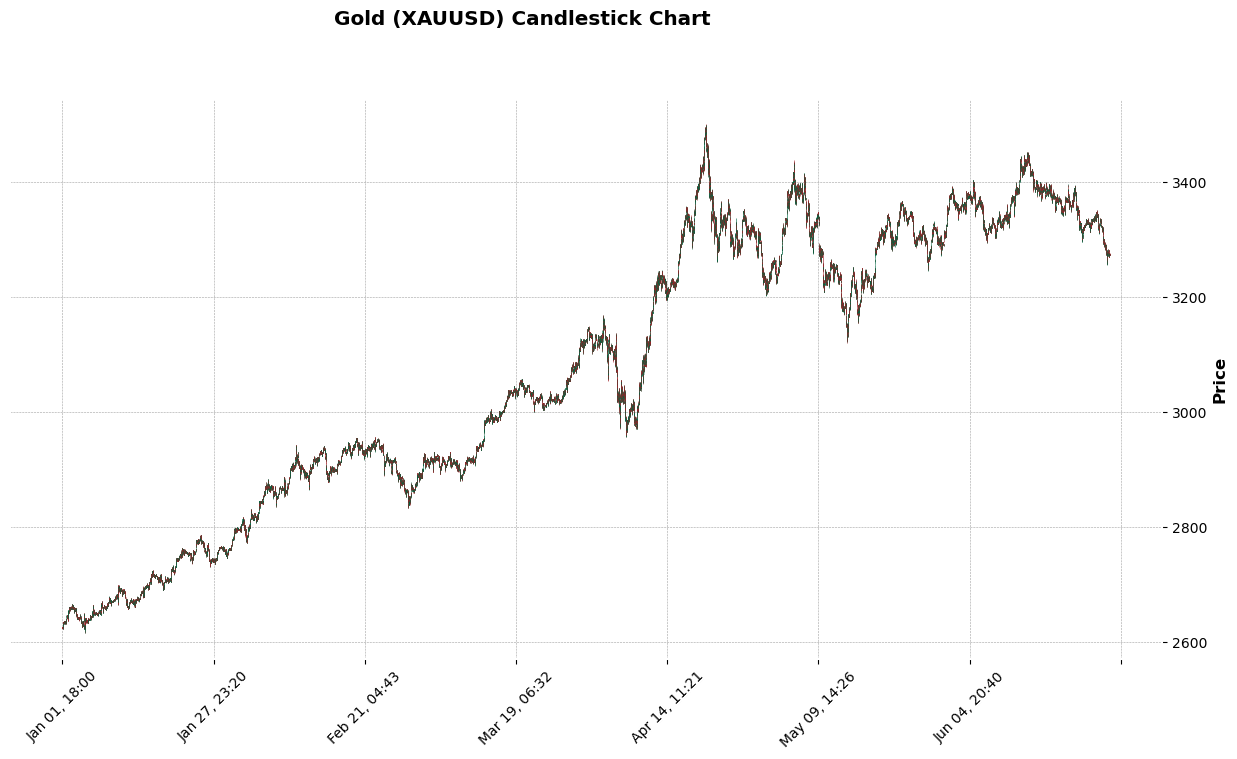

In [9]:
import mplfinance as mpf

import matplotlib.pyplot as plt

# Visualize the cleaned DataFrame as a candlestick chart
mpf.plot(
    df_clean[['Open', 'High', 'Low', 'Close']],
    type='candle',
    style='charles',
    title='Gold (XAUUSD) Candlestick Chart',
    ylabel='Price',
    volume=False,
    figsize=(16, 8)
)